## Trình bày thuật toán K-Means

### Thuật toán K-Means

Lần lặp thứ 2 

centroid 1: (np.float64(-8.804870291407719), np.float64(-6.404682164297763))
centroid 2: (np.float64(9.265905523045372), np.float64(1.0381711031156797))
centroid 3: (np.float64(-1.232398715559187), np.float64(-0.7504626863653728))
centroid 4: (np.float64(-7.700285465430101), np.float64(2.5826219401044463))
centroid 5: (np.float64(-4.255485384953154), np.float64(-8.308543993309979))


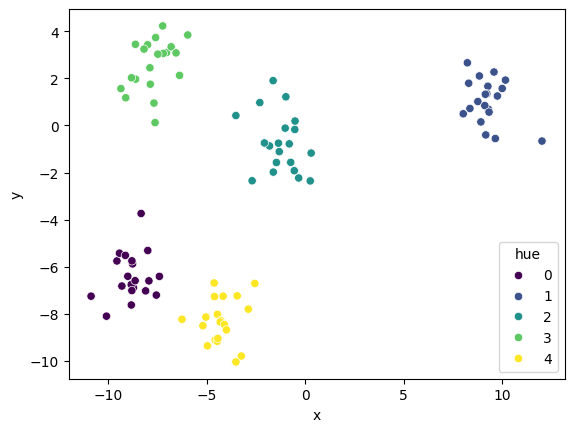

In [4]:
from numpy import random as rd
from sklearn.datasets import make_blobs
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

rd.seed(42)
X,y = make_blobs(n_samples=100,n_features=2,centers=5,cluster_std=1.0,random_state=45)

#Value in x axis
x_val = [x[0] for x in X]

#Value in y axis
y_val = [y[1] for y in X]

df = pd.DataFrame({"x":x_val,"y":y_val})

def Euclide(a,b):
    sub_square_sum = sum([(a[i]-b[i])**2 for i in range(len(a))])
    return sub_square_sum

def K_Means_divide(data,cluster,has_kmeanspp):
    # Each data point
    data_points = list(zip(*(data[x].to_list() for x in data))) # Ví dụ: trong tọa độ x,y,z data_points = [(1,2,3),(4,5,6),(7,8,9)]
    
    # Initialize centroids
    if(has_kmeanspp):
        centroids = kmeans_plus(data_points,5)
    else:
        centroids = random.sample(data_points,cluster)
    
    old_centroids = None
    
    loop = 0
    while(old_centroids != centroids):
        loop += 1
       
        datapoint_belong_to = [] #datapoint_belong_To = [1,2,3]
        
        # Iter all our data points
        for point in data_points:
            
            i = 0 #This parameter is used to find the posit of each centroid
            min_centroid_posit = 0 #This parameter is used to find the min position of centroid in centroids list
            min_distance = 1e9 #Distance of datapoint to centroids

            for centroid in centroids:
                distance = Euclide(centroid,point)
                if(min_distance > distance):
                    min_distance = distance
                    min_centroid_posit = i
                i += 1
            
            #Define datapoint correponds to its centroid
            datapoint_belong_to.append(min_centroid_posit)

        data["cluster"] = datapoint_belong_to
        #Calculate again the centroid:
        old_centroids = centroids.copy()
       
        for i in range(cluster):
            tmp_df = data[data["cluster"] == i].iloc[:,:-1]
            centroids[i] = tuple((np.mean(tmp_df[x]) for x in tmp_df))

    print(f"Lần lặp thứ {loop} \n")

    stt = 1
    for x in centroids:
        print(f"centroid {stt}: {x}")
        stt += 1
    return datapoint_belong_to


df["hue"] = K_Means_divide(df,5,has_kmeanspp=True)
sns.scatterplot(x=df["x"],y=df["y"],hue=df["hue"], palette="viridis")
plt.show()


### Thuật toán K-Means++: Kmeans cải tiến (Centroids được gieo có chủ đích)

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

def kmeans_plus(datapoints,cluster):
    first_centroids = random.choice(datapoints)
    
    centroids_list = [first_centroids] #Store out centroids
    
    color_position = 0
    #K-means algorithm:
    for _ in range(cluster-1):
        
        #Draw 
        distance_list = [] #Store all distance from each datapoints to correspondent centroids
        for point in datapoints:
            min_distance = 1e9 #Store distance from datapoints to nearest centroids
            for centroid in centroids_list:
                distance = Euclide(point,centroid)
                if(min_distance > distance):
                    min_distance = distance
            #Append min distance
            distance_list.append(min_distance)
        
        #Determine index of max distance
        idx_max = distance_list.index(max(distance_list))
        
        #Append to centroids list:
        centroids_list.append(datapoints[idx_max])




    return centroids_list
            

### Elbow method:

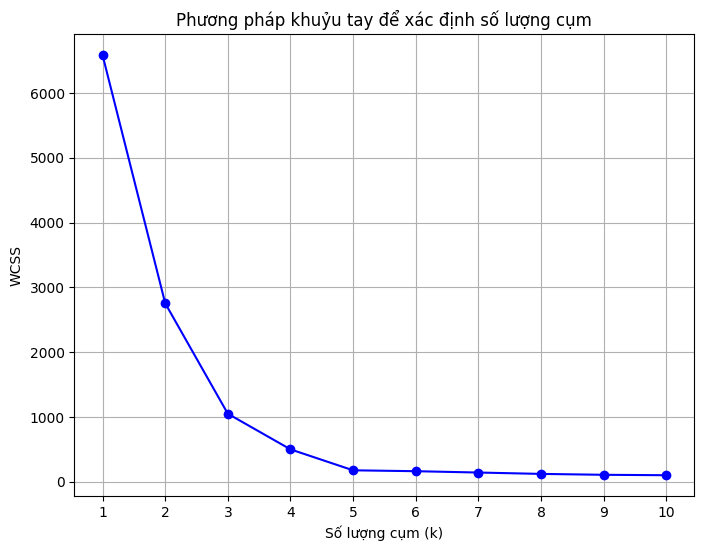

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_forecast = 10 #Thông thường là từ 10 đến 20

wcss = [] #Mảng lưu trữ các tổng bình phg khoảng cách từng dữ liệu đến centroid tương ứng của nó

for i in range(1,k_forecast+1):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) # inertia là tổng bình phương khoảng cách đến centroid

plt.figure(figsize=(8, 6))
plt.plot(range(1, k_forecast+1), wcss, marker='o', linestyle='-', color='b')
plt.title('Phương pháp khuỷu tay để xác định số lượng cụm')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, k_forecast+1))
plt.grid(True)
plt.show()

### Silhoutte score để kiểm tra độ hiệu quả của thuật toán:


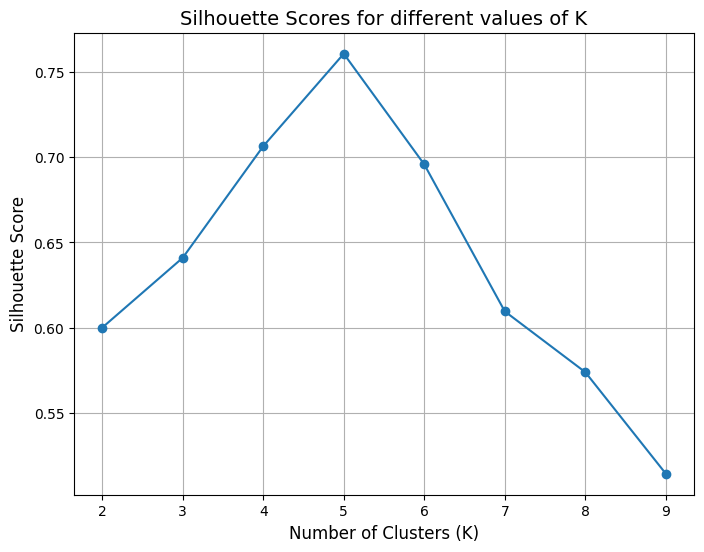

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Khởi tạo biến để lưu kết quả Silhouette
silhouette_scores = []
K_values = list(range(2, 10))

# Duyệt qua các giá trị K và tính Silhouette Score
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for different values of K', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.show()

### Điều kiện sử dụng thuật toán K-Means
Để sử dụng thuật toán K-Means một cách hiệu quả, dữ liệu cần thỏa mãn một số điều kiện nhất định nhằm đảm bảo việc phân cụm chính xác và tối ưu. Các điều kiện này bao gồm:

+ Dữ liệu số liên tục: K-Means hoạt động tốt với dữ liệu dạng số liên tục. Nếu dữ liệu có các giá trị phân loại (categorical), cần chuyển đổi chúng sang dạng số, ví dụ như sử dụng phương pháp one-hot encoding. --> Mã hóa one-hot encoding

+ Phân phối các cụm (clusters) hình cầu và tương đối đều đặn: K-Means giả định rằng các cụm có dạng hình cầu và có kích thước tương tự nhau. Nếu các cụm có hình dạng khác, ví dụ như dạng elip, hoặc phân bố không đồng đều về kích thước, K-Means có thể cho kết quả không chính xác. --> Sử dụng biểu đồ phân tán

+ Khoảng cách Euclidean phù hợp: K-Means sử dụng khoảng cách Euclidean để đo lường độ tương tự giữa các điểm dữ liệu. Do đó, dữ liệu phải có mối quan hệ tuyến tính và khoảng cách Euclidean phải phản ánh được sự khác biệt giữa các điểm dữ liệu. --> Chuẩn hóa dữ liệu

+ Không gian đa chiều hợp lý: Trong không gian có nhiều chiều (high-dimensional space), thuật toán K-Means có thể gặp khó khăn vì hiện tượng "curse of dimensionality". Việc giảm số chiều (dimensionality reduction) bằng các phương pháp như PCA (Principal Component Analysis) có thể giúp cải thiện hiệu quả. --> Giảm chiều dữ liệu bằng PCA

+ Dữ liệu không có nhiễu: K-Means nhạy cảm với nhiễu (outliers). Các điểm dữ liệu nhiễu có thể ảnh hưởng đến trung tâm cụm (centroid) và dẫn đến kết quả không chính xác. Do đó, nên loại bỏ hoặc xử lý các điểm nhiễu trước khi áp dụng thuật toán. --> Loại bỏ ngoại lai

+ Số cụm k đã biết trước hoặc có thể ước tính: Thuật toán K-Means yêu cầu biết trước số cụm k. Nếu chưa biết số cụm phù hợp, có thể sử dụng phương pháp như Elbow Method hoặc Silhouette Score để xác định giá trị k tốt nhất. --> Dùng Elbow hoặc Silhouette Score

Tóm lại, dữ liệu sử dụng K-Means nên có dạng số liên tục, các cụm có hình cầu, không chứa quá nhiều nhiễu và có thể đo lường bằng khoảng cách Euclidean.

### Ứng dụng thực tế

1. Nén ảnh

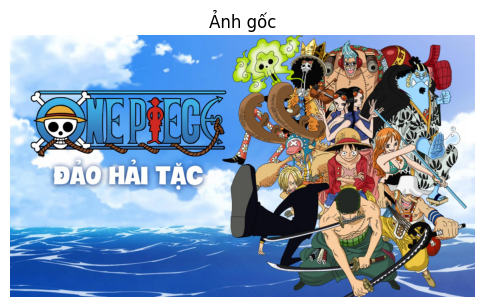

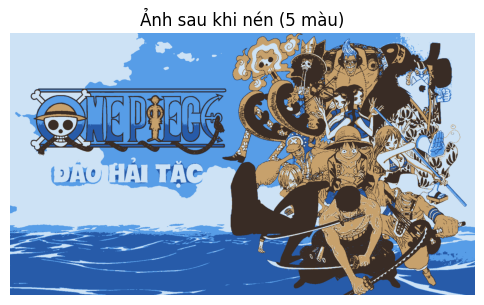

In [12]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Đọc ảnh từ file
image = cv2.imread(r'C:\Users\Asus\Downloads\one-piece.jpg')

# Chuyển từ BGR (OpenCV) sang RGB (để hiển thị đúng màu)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh gốc
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.title('Ảnh gốc')
plt.imshow(image)
plt.show()

# Định dạng lại ảnh thành mảng 2D
pixels = image.reshape(-1, 3)

# Sử dụng thuật toán K-Means để giảm số lượng màu
num_colors = 4  # Số lượng màu mong muốn sau khi nén
kmeans = KMeans(n_clusters=num_colors, random_state=42)
kmeans.fit(pixels)

# Thay thế mỗi pixel bằng màu của tâm cụm gần nhất
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_pixels.reshape(image.shape)

# Chuyển đổi màu thành dạng số nguyên (từ 0-255)
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

# Hiển thị ảnh sau khi nén
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.title('Ảnh sau khi nén ({} màu)'.format(num_colors))
plt.imshow(compressed_image)
plt.show()


2. Lựa chọn bảng màu (Color Palette Extraction)  
K-Means có thể giúp trích xuất bảng màu (color palette) từ một bức ảnh bằng cách nhóm các màu tương tự nhau và chọn ra các màu đại diện của từng nhóm. Điều này có thể giúp các nhà thiết kế đồ họa hoặc nhà thiết kế thời trang dễ dàng lựa chọn màu sắc cho sản phẩm của họ.

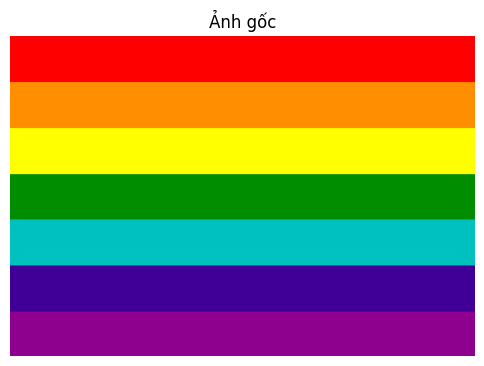

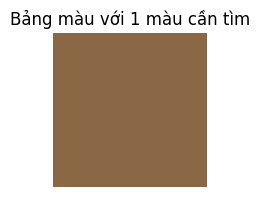

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Đọc ảnh từ file
image = cv2.imread(r'C:\Users\Asus\Downloads\gay-flag.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image.reshape(-1, 3)

# Hiển thị ảnh gốc
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.title('Ảnh gốc')
plt.imshow(image)
plt.show()

# Áp dụng K-Means để tìm bảng màu
number_of_color = 1
kmeans = KMeans(n_clusters=number_of_color)
kmeans.fit(pixels)
colors = kmeans.cluster_centers_

# Hiển thị bảng màu
plt.figure(figsize=(8, 2))
plt.title(f'Bảng màu với {number_of_color} màu cần tìm')
plt.imshow([colors.astype('uint8')])
plt.axis('off')
plt.show()
